In [7]:
#| echo: false

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Probability {#sec-probability}

Imagine a game where you flip a single coin once. The possible outcomes are head (H) and tail (T). The set of all possible outcomes of the game is called the *sample* space of the experiment. We will denote this set with $\Omega$. For a single coin toss game, the sample space is $\Omega = \{\text{heads}, \text{tails}\}$.

::: {#def-probability}
## Probability

Let $\Omega$ denote the sample space of a random experiment. Let $A \subseteq \Omega$ and $B \subset \Omega$ be two disjoint events (i.e. $A \cap B = \varnothing$). Disjoint events are events that cannot co-occur. A probability measure on this space has the following properties:

$$
\begin{align}
  & P(A) \geq 0 \qquad \text{non-negativity}\\
  & P(\Omega) = 1 \qquad  \text{unit measure} \\
  & P(A \cup B) = P(A) + P(B) \qquad \text{additivity}
\end{align}
$$
:::

:::{#thm-probability-complement}
## Probability of complementary sets

Let $\Omega$ be a sample space, let $A \subseteq \Omega$ be a subset of the sample space, and let $\bar{A} = \Omega \setminus A$ be the complement of $A$ in $\Omega$. Then the probability of the complementary set is given by:

$$
P(A) = 1 - P(\bar{A})
$$
:::

:::{.proof}
For the proof note that $A$ and $\bar{A}$ are disjoint by definition ($A \cap \bar{A} = \varnothing$). Using the additivity of probability together with the unit probability of the sample space $\Omega$ from @def-probability, it follows that:

$$
\begin{align*}
    P(A \cup \bar{A}) = P(A) + P(\bar{A})
\end{align*}
$$

$$
\begin{align*}
    P(A \cup \bar{A}) & =  P(\Omega) \\
    P(A) + P(\bar{A}) & = 1 \implies \\
    P(A) & = 1 - P(\bar{A}).
\end{align*}
$$
:::

::: {#exm-probability-weather}
## Weather forecast

The weather forecast for the next day shows that it will be raining ($A$) with probability $P(A) = 0.3$. The sample space is $\Omega = \{A, \bar{A}\}$ and the probability of not raining ($\bar{A}$) is then $P(\bar{A}) = 1 - 0.3 = 0.7$.
:::

::: {#exm-probability-dice}
## Dice

In a game where you roll a (6-sided) dice once the sample space is $\Omega = \{1, 2, 3, 4, 5, 6\}$. Denote the outcome of a roll with $X$ and assume that the probability of each outcome is equal: $P(X = i) = 1 / 6, i = 1,2,\ldots,6$. The probability of the event $X = 1$ is then $P(X = 1) = 1/6$. The probability of the event "outcome is not one" is $P(X \neq 1) = P(X > 1) = 5 / 6.$
:::

See @BERTSEKAS2008IntroductionProbability (Chapter 1) for a more thorough treatment of the subject.

## A Simulated Game

Let's create two games to illustrate the concept of probability. In both games the sample space is $\Omega = \{0, 1, 2\}$, i.e. the outcome of the game is a number between 0 and 2. The probabilities of the possible outcomes (let's sey winnings) are given by the following table:

In [8]:
#| label: tbl-games
#| tbl-cap: Outcomes and probabilities

games = pd.DataFrame({
    'x': [0, 1, 2],
    "p_x": [0.5, 0.3, 0.2],
    'y': [0, 1, 2],
    "p_y": [0.5, 0.1, 0.3]
})

# games.style.hide_index()
from IPython.display import Markdown
Markdown(games.to_markdown(index=False))


|   x |   p_x |   y |   p_y |
|----:|------:|----:|------:|
|   0 |   0.5 |   0 |   0.5 |
|   1 |   0.3 |   1 |   0.1 |
|   2 |   0.2 |   2 |   0.3 |

Wir können die Verteilung der Gewinne in einem Balkendiagramm darstellen.

Text(0, 0.5, 'Probability')

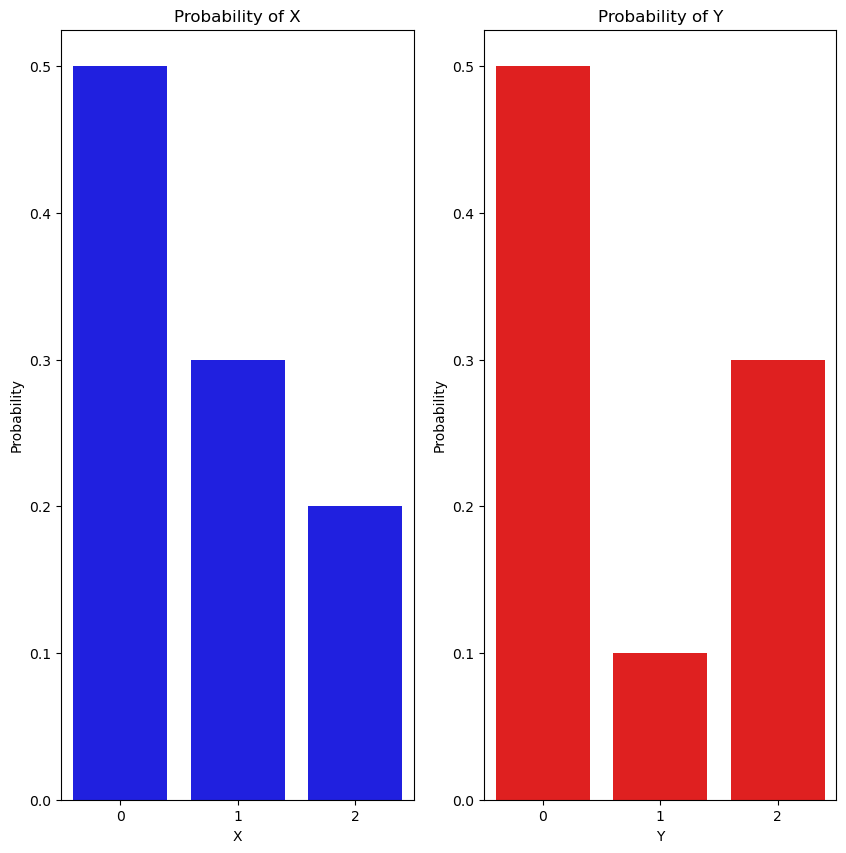

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.barplot(data=games, x="x", y="p_x", color='blue', ax = ax[0])
ax[0].set_title('Probability of X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Probability')

sns.barplot(data=games, x="y", y="p_y", color='red', ax = ax[1])
ax[1].set_title('Probability of Y')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Probability')


## Erwartungswert

Wir können die Verteilungen der Gewinne als Generatoren von Zufallszahlen auffassen, die durch Regeln bestimmt sind.
Es ist einfacher, wenn wir Zufallszahlen aus einer Verteilung generieren und uns die generierten Werten ansehen.


In [19]:
game_x_results = np.random.choice(games['x'], p=games['p_x'], size=1000)
pd.DataFrame(np.unique(game_x_results, return_counts=True))

,0,1,2
0,0,1,2
1,524,282,194


In [ ]:
# Benutzen Sie np.random.choice, um 10 000 Spiele aus der Verteilung von Y zu simulieren, und speichern Sie die Ergebnisse in game_y_results.
# Zählen Sie die Anzahl der 0, 1 und 2 in game_y_results.


Was ist der durchschnittliche Gewinn in Spiel 1 und Spiel 2?

In [20]:
np.mean(game_x_results)

0.67

In [ ]:
# Berechnen Sie den durchschnittlichen Gewinn Spiel Y.


Eine interessante Frage ist, ob wir die durchschnittlichen Gewinne in den beiden Spielen berechnen können, ohne die Spiele durchspielen zu müssen. Die Antwort ist ja, wir können den *Erwartungswert* der Gewinne berechnen, denn wir kennen die Wahrscheinlichkeiten der möglichen Gewinne.


$$
E(X) = \sum_{i=1}^{n} x_i \cdot P(X = x_i)
$$


In [ ]:
np.sum(games['x'] * games['p_x'])

In [ ]:
# Berechnen Sie den Erwartungswert von Spiel Y.


In [3]:
# The expected values of the games are:

# E[X] = 0 * 0.5 + 1 * 0.3 + 2 * 0.2 = 0.7
# E[Y] = 0 * 0.5 + 1 * 0.1 + 2 * 0.3 = 0.7

E_X = np.sum(games['x'] * games['p_x'])
E_Y = np.sum(games['y'] * games['p_y'])

print("Expected value of X:", E_X)
print("Expected value of Y:", E_Y)


Expected value of X: 0.7
Expected value of Y: 0.7


In [ ]:
# Discretized bivariate normal distribution
import numpy as np
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for the bivariate normal distribution
mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

# Define the bivariate normal distribution
rv = multivariate_normal(mean, cov)

# Define the intervals
x = np.array(-1, 0, 1)
y = np.array(-1, 0, 1)

